In [1]:
!pip install scikeras
!pip install tensorflow

In [95]:
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from warnings import filterwarnings
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import Perceptron

In [8]:
df=sns.load_dataset("iris")

In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 1. Step 1 EDA

In [10]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


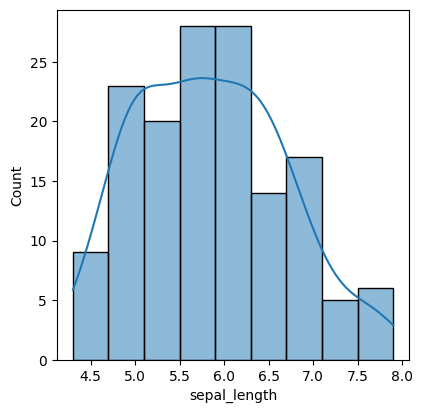

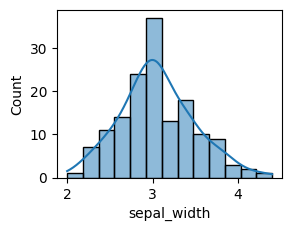

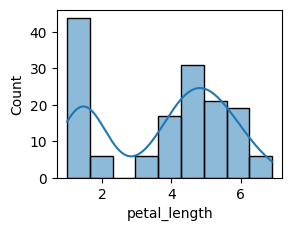

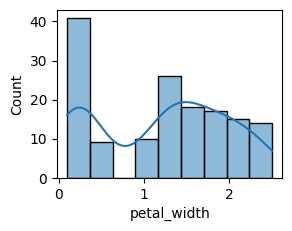

In [18]:
plt.figure(figsize=(10, 10))
for idx,value in enumerate(df.columns):
  if value!="species":
    plt.subplot(2, 2, idx+1)
    sns.histplot(data=df,x=value,kde=True)
    plt.show()

<Axes: xlabel='species', ylabel='count'>

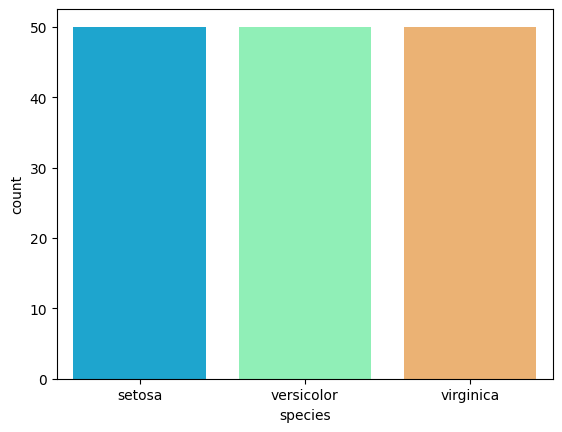

In [23]:
sns.countplot(data=df,x="species",palette="rainbow")

# 2. Pipeline Setup

In [24]:
cols=[c for c in df.columns if c!="species"]

In [25]:
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [31]:
le=LabelEncoder()
le.fit(df["species"])
df["species"]=le.transform(df["species"])

In [65]:
preprocessor=ColumnTransformer([
    # ("ms",MinMaxScaler(),cols)
    ("ms",StandardScaler(),cols)
])


#3. Split portion

In [66]:
X=df.drop("species",axis=1)
y=df["species"]

### 3.1 `stratify=y` makes sure the train and test sets keep the same class proportions as the original dataset, even if it’s imbalanced. ✅

In [67]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

# 4. Perceptron Model

In [74]:
# def model():
#   per=Perceptron(max_iter=1000,random_state=42)
#   return per


In [69]:
pipeline=Pipeline([
    ("preprocessor",preprocessor),
    # ("md",model())
    ("md",Perceptron(max_iter=1000,random_state=42))
])

In [70]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ms', StandardScaler(),
                                                  ['sepal_length',
                                                   'sepal_width',
                                                   'petal_length',
                                                   'petal_width'])])),
                ('md', Perceptron(random_state=42))])

In [71]:
y_per_pred=pipeline.predict(X_test)

In [72]:
accuracy_score(y_test,y_per_pred)

0.8666666666666667

In [73]:
print(classification_report(y_test,y_per_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.70      0.78        10
           2       0.75      0.90      0.82        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



# 5. ANN model

In [82]:
preprocessor=ColumnTransformer([
    # ("ms",MinMaxScaler(),cols)
    ("ms",StandardScaler(),cols)
])

In [91]:
def mod():
  model=Sequential([
      layers.Dense(10,activation="relu",input_shape=(X.shape[1],)),
      layers.Dense(10,activation="relu"),
      layers.Dense(len(np.unique(y)),activation="softmax")
  ])
  model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
  return model


In [105]:
clf=KerasClassifier(model=mod,epochs=100,batch_size=10,verbose=1)

In [93]:
pipeline_ann=Pipeline([
    ("preprocessor",preprocessor),
    ("md",clf)
])

In [98]:
pipeline_ann.fit(X_train,y_train,md__validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2047 - loss: 1.2210 - val_accuracy: 0.0833 - val_loss: 1.2332
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1746 - loss: 1.1761 - val_accuracy: 0.1667 - val_loss: 1.1815
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2360 - loss: 1.1168 - val_accuracy: 0.1667 - val_loss: 1.1375
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2558 - loss: 1.0847 - val_accuracy: 0.2083 - val_loss: 1.0957
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3430 - loss: 1.0407 - val_accuracy: 0.2917 - val_loss: 1.0553
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5381 - loss: 0.9900 - val_accuracy: 0.5000 - val_loss: 1.0162
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6418 - loss: 0.9423 - val_accuracy: 0.5417 - val_loss: 0.9773
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7243 - loss: 0.9111 - val_accuracy: 0.6250 - 

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ms', StandardScaler(),
                                                  ['sepal_length',
                                                   'sepal_width',
                                                   'petal_length',
                                                   'petal_width'])])),
                ('md',
                 KerasClassifier(batch_size=10, epochs=100, model=<function mod at 0x7ed04d08a340>))])

In [107]:
# test_acc = pipeline_ann.score(X_test, y_test)
# print(f"Test Accuracy: {test_acc:.2f}")

In [108]:
# from sklearn.metrics import accuracy_score

# y_pred = pipeline_ann.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# print("Accuracy:", acc)
